# Mafia Maalik

# Roll_number_f22_013

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
#from keras.layers import Dense, Dropout, Activation, Flatten

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
#from keras.utils import np_utils
import seaborn as sn

### Loading data

In [26]:
data=pd.read_csv(r'C:\Users\MiCRo PeRsoNaL\Downloads\archive\heart.csv')

## Showing data

In [27]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Making Dependent and Independent Targets

In [31]:
X=data.drop(['target'],axis=1)

y=data['target']

## Training data for prediction

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [33]:
Classifier = LogisticRegression(solver='liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
y_test_hat = Classifier.predict(X_test)

In [35]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
49,0,0
525,1,1
119,1,1
629,0,1
186,0,0
691,1,1
473,1,1
422,1,1
27,0,1
815,1,0


In [36]:
print(accuracy_score(y_test,y_test_hat))

0.8116883116883117


In [37]:
y_train_hat = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_hat))

0.8479776847977685


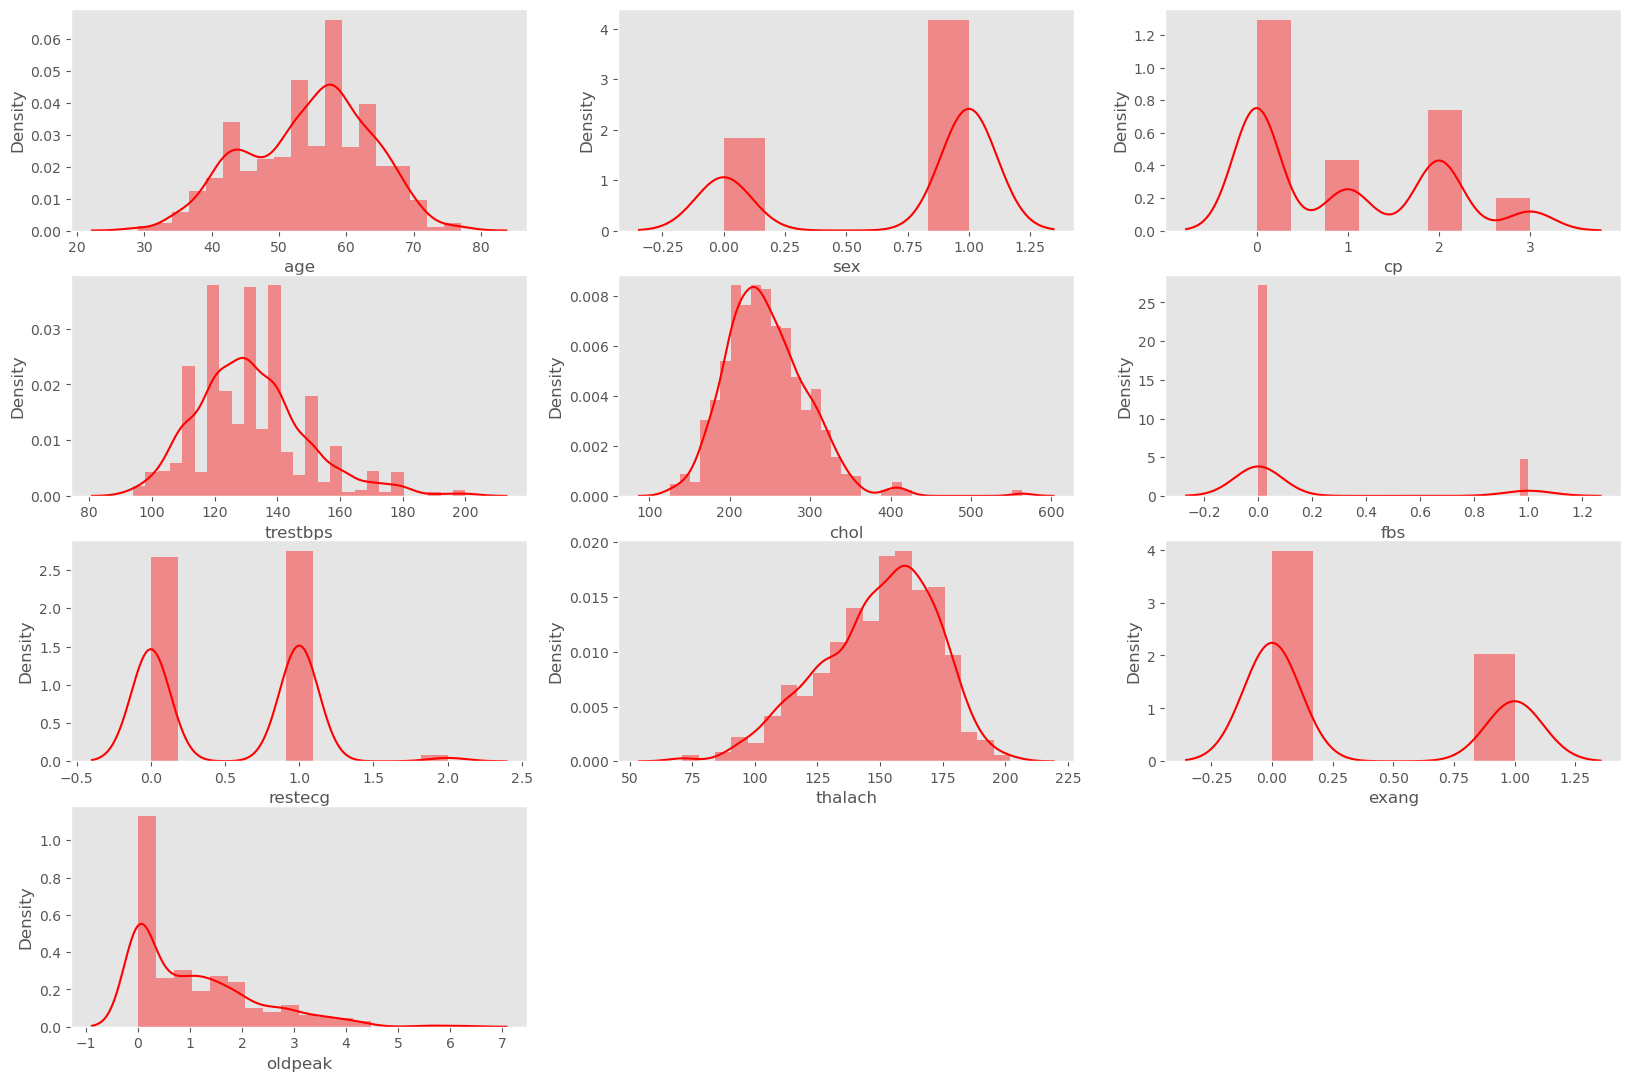

In [38]:
plt.figure(figsize = (20, 27))

for i in range(10):
    plt.subplot(8, 3, i+1)
    sns.distplot(data.iloc[:, i], color = 'red')
    plt.grid()

## Checking accuracies of KNN ,NB and SVM

In [39]:

from sklearn.preprocessing import LabelEncoder

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the models
models = [
    ('SVM', SVC(kernel='linear', C=1)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('NB', GaussianNB())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.3f}")

SVM Accuracy: 0.805
KNN Accuracy: 0.732
NB Accuracy: 0.800


## Showing ROC

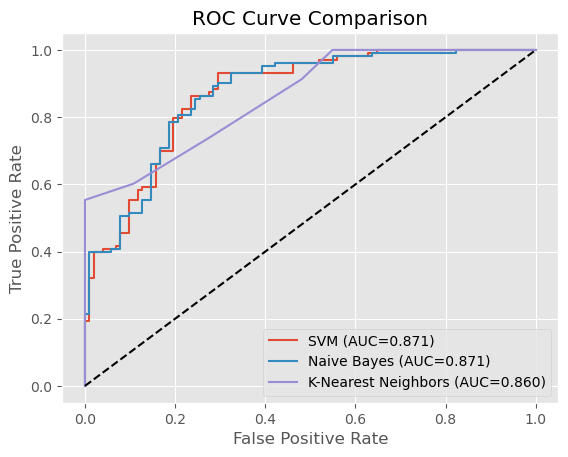

In [40]:
from sklearn.metrics import roc_curve, auc


# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the models
models = [
    ('SVM', SVC(kernel='linear', C=1, probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))
]

# Create a figure and axis
fig, ax = plt.subplots()

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

# Plot the ROC curve
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend(loc='best')
plt.show()

## Applying Majority voting classifier

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the individual models
svm_model = SVC(kernel='linear', C=1)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Train the individual models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Define the majority voting classifier
class MajorityVotingClassifier:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        predictions = []
        for model in self.models:
            predictions.append(model.predict(X))
        return [max(set(row), key=row.count) for row in zip(*predictions)]

# Create an instance of the majority voting classifier
mv_classifier = MajorityVotingClassifier([svm_model, knn_model, nb_model])

# Train the majority voting classifier
mv_classifier.fit(X_train, y_train)

# Evaluate the majority voting classifier
y_pred = mv_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Majority Voting Classifier Accuracy: {accuracy:.3f}")

Majority Voting Classifier Accuracy: 0.810


## Making Confusion Matrix

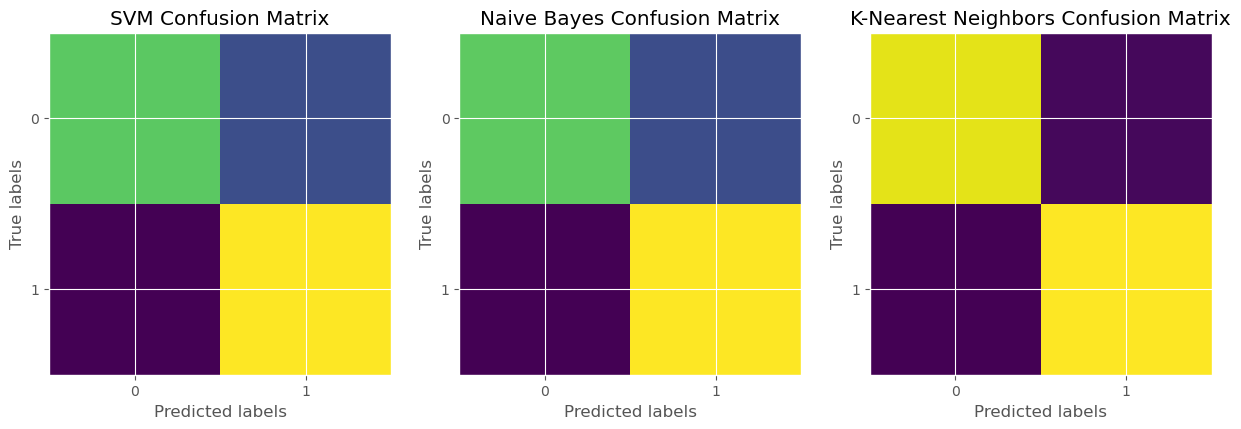

In [42]:

from sklearn.metrics import confusion_matrix


# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the models
models = [
    ('SVM', SVC(kernel='linear', C=1)),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))
]

# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Train and evaluate each model
for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax[i].imshow(cm, interpolation='nearest')
    ax[i].set_title(f"{name} Confusion Matrix")
    ax[i].set_xlabel("Predicted labels")
    ax[i].set_ylabel("True labels")
    ax[i].set_xticks(range(len(le.classes_)))
    ax[i].set_yticks(range(len(le.classes_)))
    ax[i].set_xticklabels(le.classes_)
    ax[i].set_yticklabels(le.classes_)

plt.show()

## Accuracies comparison

Naive Bayes Accuracy: 0.800
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Naive Bayes Confusion Matrix:
[[72 30]
 [11 92]]

K-Nearest Neighbors Accuracy: 0.732
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205

K-Nearest Neighbors Confusion Matrix:
[[74 28]
 [27 76]]

Support Vector Machine Accuracy: 0.805
Support Vector Machine Classification Report:
           

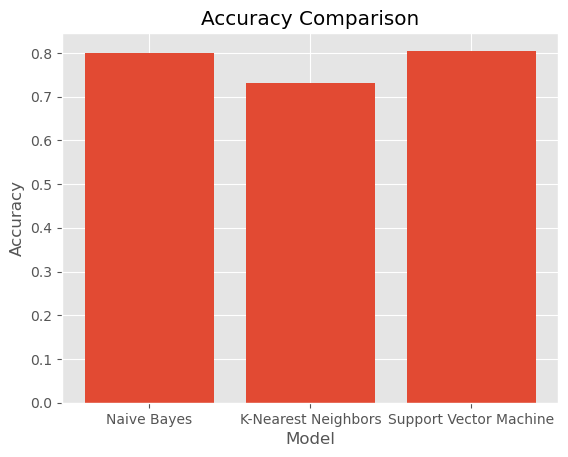

In [43]:
i
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the models
models = [
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Machine', SVC(kernel='linear', C=1))
]

# Train and evaluate each model
accuracies = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))
    print(f"{name} Accuracy: {accuracy:.3f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Plot the accuracy comparison
plt.bar(range(len(models)), [accuracy for _, accuracy in accuracies])
plt.xticks(range(len(models)), [name for name, _ in accuracies])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## ...........................THE END ....................